In [40]:
#Final Project
#The Last column of our data will hold 0 for <=50k & 1 for >50k
import numpy as np
import pandas as pd
import matplotlib.pyplot as mp
from pylab import show
import test
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest # Used for determing the strongest relationship feautures with target
from sklearn.feature_selection import chi2 # Used for KBest non negative numbers
from sklearn.ensemble import ExtraTreesClassifier # Used for determing the strongest relationship feautures with target

# Imports Models Used
from sklearn.neighbors import KNeighborsClassifier # KNN
from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.naive_bayes import GaussianNB # Gaussian Naive Bayes


In [41]:
#Loading the data
adultData = pd.read_csv("adult.data",header= None,engine='python',delimiter=',',skipinitialspace=True)
adultData = adultData.T

In [42]:
#Adjusting Work Class:
a = ["Private", "Self-emp-not-inc", "Self-emp-inc", "Federal-gov", 
     "Local-gov", "State-gov", "Without-pay", "Never-worked"]

for i in range(adultData.shape[1]):
    try:
        adultData.loc[1,i] = (a.index(adultData.loc[1,i])) + 1
    except:
        adultData.loc[1,i] = 0



In [43]:
#Adjusting Educational Level:
#*Less than HS will be 0
b = ["Bachelors", "Some-college", "HS-grad", "Prof-school", "Assoc-acdm", "Assoc-voc", "Masters", "Doctorate", "Preschool"]
for i in range(adultData.shape[1]):
    try:
        adultData.loc[3,i] = (b.index(adultData.loc[3,i])) + 1
    except:
        adultData.loc[3,i] = 0


In [44]:
#Adjusting Marital-Status
c = ["Married-civ-spouse", "Divorced", "Never-married", "Separated", 
     "Widowed", "Married-spouse-absent", "Married-AF-spouse"]
for i in range(adultData.shape[1]):
    try:
        adultData.loc[5,i] = (c.index(adultData.loc[5,i])) + 1
    except:
        adultData.loc[5,i] = 0

In [45]:
#Adjusting Occupation
d = ["Tech-support", "Craft-repair", "Other-service", "Sales", "Exec-managerial", "Prof-specialty", "Handlers-cleaners",
     "Machine-op-inspct", "Adm-clerical", "Farming-fishing", "Transport-moving", "Priv-house-serv", "Protective-serv", "Armed-Forces"]
for i in range(adultData.shape[1]):
    try:
        adultData.loc[6,i] = (d.index(adultData.loc[6,i])) + 1
    except:
        adultData.loc[6,i] = 0

In [46]:
#Adjusting relationship
e = ["Wife", "Own-child", "Husband", "Not-in-family", "Other-relative", "Unmarried"]
for i in range(adultData.shape[1]):
    try:
        adultData.loc[7,i] = (e.index(adultData.loc[7,i])) + 1
    except:
        adultData.loc[7,i] = 0

In [47]:
#Adjusting Race
f = ["White", "Asian-Pac-Islander", "Amer-Indian-Eskimo", "Other", "Black"]
for i in range(adultData.shape[1]):
    if adultData.loc[8,i] != "Other":
        adultData.loc[8,i] = (f.index(adultData.loc[8,i])) + 1
    else:
        adultData.loc[8,i] = 0


In [48]:
#Adjusting sex
for i in range(adultData.shape[1]):
    if adultData.loc[9,i] == "Male":
        adultData.loc[9,i] = 0
    else:
        adultData.loc[9,i] = 1

In [49]:
#Adjusting Native Country
g = ["United-States", "Cambodia", "England", "Puerto-Rico", "Canada", "Germany", "Outlying-US(Guam-USVI-etc)", "India",
     "Japan", "Greece", "South", "China", "Cuba", "Iran", "Honduras", "Philippines", "Italy", "Poland", "Jamaica", "Vietnam", "Mexico", "Portugal", "Ireland", "France",
     "Dominican-Republic", "Laos", "Ecuador", "Taiwan", "Haiti", "Columbia", "Hungary", "Guatemala", "Nicaragua", "Scotland",
     "Thailand", "Yugoslavia", "El-Salvador", "Trinadad&Tobago", "Peru", "Hong", "Holand-Netherlands"]
for i in range(adultData.shape[1]):
    try:
        adultData.loc[13,i] = (g.index(adultData.loc[13,i])) + 1
    except:
        adultData.loc[13,i] = 0

In [71]:
# Adjust Salary
for i in range(adultData.shape[1]):
        if(adultData.loc[14,i] == "<=50K"):
            adultData.loc[14,i] = 0
        else:
            adultData.loc[14,i] = 1
       

In [72]:
#Code to be run after all data is appropriately adjusted.
features = []
digits = []

for i in range(adultData.shape[1]):
    features.append(adultData[i].iloc[:-1])
    digits.append(adultData[i].iloc[-1])
 

In [75]:
#Split the Data in an 80/20 - Testing/Training

numTrain = int(len(features)*.2)

trainFeatures = features[:numTrain]
testFeatures = features[numTrain:]
trainDigits = digits[:numTrain]
testDigit = digits[numTrain:]

In [76]:
#Colors will be passed to the graphing library to color the points.  
colors = [] 

for index in range(len(trainFeatures)):
    # Salary over 50k are blue: "b" and salary under 50k  are red: "r"
    if(trainDigits[index] == 0):
        colors.append("r")
    else:
        colors.append("b")

# Finding the features with the strongest relationship to the output
Feature List:
<br>
0 - Age
<br>
1 - Work Class
<br>
2 - Final Weight
<br>
3 - Education
<br>
4 - Education Num
<br>
5 - Marital Status
<br>
6 - Occcupation
<br>
7 - Relationship
<br>
8 - Race
<br>
9 - Sex 
<br>
10 - Capital Gain 
<br>
11 - Capital Loss
<br>
12 - Hours per Week
<br>
13 - Native Country
<br>


In [109]:
# Get and transform independent columns
X = adultData.iloc[:-1]
X = X.transpose()
y = adultData.iloc[-1]
y = y.astype('int')


# Select KBest Classifier

In [114]:
# Apply SelectKBest class to extract top 14 best features
bestfeatures = SelectKBest(score_func = chi2, k = 14)
fit = bestfeatures.fit(X, y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

Specs         Score
10     10  8.219247e+07
11     11  1.372146e+06
2       2  1.711477e+05
0       0  8.600612e+03
12     12  6.476409e+03
5       5  3.144062e+03
4       4  2.401422e+03
13     13  1.357195e+03
3       3  1.232605e+03
9       9  1.016447e+03


# Extra Trees Classifier

[0.15892842 0.0412642  0.16320904 0.04130026 0.08081152 0.09045851
 0.07899254 0.06689802 0.01533406 0.02933591 0.08965464 0.02798993
 0.09493563 0.02088732]


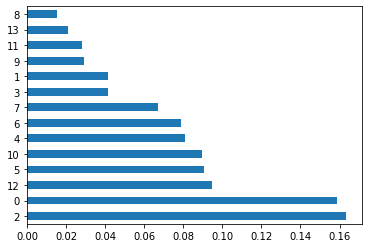

In [111]:
# Apply Extra Trees Classifier class to extract top 14 best features
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(14).plot(kind='barh')
mp.show()

# KNN best two and worst two features

Accuracy : (Distance = Euclidean | Neighbors = 1) : 0.83 (+/- 0.02)
Accuracy : (Distance = Euclidean | Neighbors = 3) : 0.83 (+/- 0.02)
Accuracy : (Distance = Euclidean | Neighbors = 5) : 0.83 (+/- 0.02)
Accuracy : (Distance = Euclidean | Neighbors = 7) : 0.83 (+/- 0.02)
Accuracy : (Distance = Euclidean | Neighbors = 10) : 0.83 (+/- 0.02)
Accuracy : (Distance = Euclidean | Neighbors = 12) : 0.82 (+/- 0.02)
Accuracy : (Distance = Euclidean | Neighbors = 14) : 0.82 (+/- 0.02)


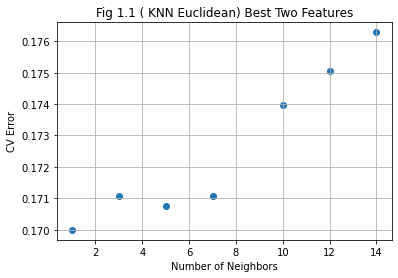

In [126]:
# Using the best two Features in KNN according to Select KBest
bestFeatures = []

for row in trainFeatures:
    featureOne = row[10]
    featureTwo = row[11]
    bestFeatures.append([featureOne, featureTwo])


numOfNeighbors = [1,3,5,7,10,12,14]
KnnEuclidean = []
for i in numOfNeighbors:
    scores = cross_val_score(KNeighborsClassifier(n_neighbors = i), bestFeatures, trainDigits, cv = 10)
    KnnEuclidean.append(1 - scores.mean())
    print("Accuracy : (Distance = Euclidean | Neighbors = %i) : %0.2f (+/- %0.2f)" % (i,scores.mean(), scores.std() * 2))

# Graph Results
mp.scatter(numOfNeighbors, KnnEuclidean) 
mp.title('Fig 1.1 ( KNN Euclidean) Best Two Features') 
mp.xlabel('Number of Neighbors') 
mp.ylabel('CV Error') 
mp.grid()  
show()

Accuracy : (Distance = Euclidean | Neighbors = 1) : 0.71 (+/- 0.09)
Accuracy : (Distance = Euclidean | Neighbors = 3) : 0.75 (+/- 0.07)
Accuracy : (Distance = Euclidean | Neighbors = 5) : 0.75 (+/- 0.06)
Accuracy : (Distance = Euclidean | Neighbors = 7) : 0.75 (+/- 0.06)
Accuracy : (Distance = Euclidean | Neighbors = 10) : 0.77 (+/- 0.03)
Accuracy : (Distance = Euclidean | Neighbors = 12) : 0.78 (+/- 0.03)
Accuracy : (Distance = Euclidean | Neighbors = 14) : 0.77 (+/- 0.03)


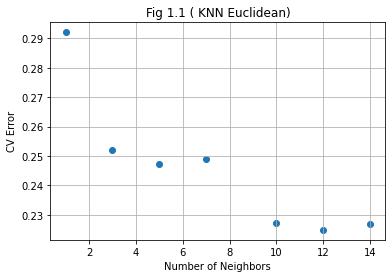

In [121]:
# Using the worst two Features in KNN according to Select KBest
worstFeatures = []

for row in trainFeatures:
    featureOne = row[3]
    featureTwo = row[9]
    worstFeatures.append([featureOne, featureTwo])


numOfNeighbors = [1,3,5,7,10,12,14]
KnnEuclidean = []
for i in numOfNeighbors:
    scores = cross_val_score(KNeighborsClassifier(n_neighbors = i), worstFeatures, trainDigits, cv = 10)
    KnnEuclidean.append(1 - scores.mean())
    print("Accuracy : (Distance = Euclidean | Neighbors = %i) : %0.2f (+/- %0.2f)" % (i,scores.mean(), scores.std() * 2))

# Graph Results
mp.scatter(numOfNeighbors, KnnEuclidean) 
mp.title('Fig 1.2 ( KNN Euclidean) Worst Two Features') 
mp.xlabel('Number of Neighbors') 
mp.ylabel('CV Error') 
mp.grid()  
show()

Accuracy : (Distance = Euclidean | Neighbors = 1) : 0.66 (+/- 0.02)
Accuracy : (Distance = Euclidean | Neighbors = 3) : 0.69 (+/- 0.03)
Accuracy : (Distance = Euclidean | Neighbors = 5) : 0.71 (+/- 0.03)
Accuracy : (Distance = Euclidean | Neighbors = 7) : 0.73 (+/- 0.02)
Accuracy : (Distance = Euclidean | Neighbors = 10) : 0.75 (+/- 0.01)
Accuracy : (Distance = Euclidean | Neighbors = 12) : 0.75 (+/- 0.01)
Accuracy : (Distance = Euclidean | Neighbors = 14) : 0.75 (+/- 0.01)


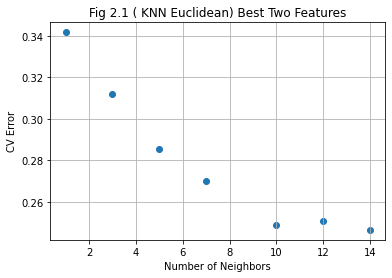

In [125]:
# Using the best two Features in KNN according to Extra Trees Classifier
bestFeatures = []

for row in trainFeatures:
    featureOne = row[0]
    featureTwo = row[2]
    bestFeatures.append([featureOne, featureTwo])


numOfNeighbors = [1,3,5,7,10,12,14]
KnnEuclidean = []
for i in numOfNeighbors:
    scores = cross_val_score(KNeighborsClassifier(n_neighbors = i), bestFeatures, trainDigits, cv = 10)
    KnnEuclidean.append(1 - scores.mean())
    print("Accuracy : (Distance = Euclidean | Neighbors = %i) : %0.2f (+/- %0.2f)" % (i,scores.mean(), scores.std() * 2))

# Graph Results
mp.scatter(numOfNeighbors, KnnEuclidean) 
mp.title('Fig 2.1 ( KNN Euclidean) Best Two Features') 
mp.xlabel('Number of Neighbors') 
mp.ylabel('CV Error') 
mp.grid()  
show()

Accuracy : (Distance = Euclidean | Neighbors = 1) : 0.60 (+/- 0.36)
Accuracy : (Distance = Euclidean | Neighbors = 3) : 0.75 (+/- 0.01)
Accuracy : (Distance = Euclidean | Neighbors = 5) : 0.75 (+/- 0.01)
Accuracy : (Distance = Euclidean | Neighbors = 7) : 0.76 (+/- 0.01)
Accuracy : (Distance = Euclidean | Neighbors = 10) : 0.76 (+/- 0.00)
Accuracy : (Distance = Euclidean | Neighbors = 12) : 0.76 (+/- 0.00)
Accuracy : (Distance = Euclidean | Neighbors = 14) : 0.76 (+/- 0.00)


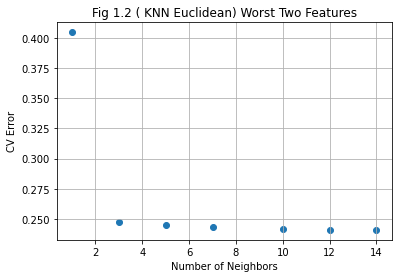

In [124]:
# Using the worst two Features in KNN according to Extra Trees Classifier
worstFeatures = []

for row in trainFeatures:
    featureOne = row[8]
    featureTwo = row[13]
    worstFeatures.append([featureOne, featureTwo])


numOfNeighbors = [1,3,5,7,10,12,14]
KnnEuclidean = []
for i in numOfNeighbors:
    scores = cross_val_score(KNeighborsClassifier(n_neighbors = i), worstFeatures, trainDigits, cv = 10)
    KnnEuclidean.append(1 - scores.mean())
    print("Accuracy : (Distance = Euclidean | Neighbors = %i) : %0.2f (+/- %0.2f)" % (i,scores.mean(), scores.std() * 2))

# Graph Results
mp.scatter(numOfNeighbors, KnnEuclidean) 
mp.title('Fig 1.2 ( KNN Euclidean) Worst Two Features') 
mp.xlabel('Number of Neighbors') 
mp.ylabel('CV Error') 
mp.grid()  
show()

# Decision Trees best two and worst two features

Accuracy : (Max Leaf Nodes = 5) : 0.82 (+/- 0.01)
Accuracy : (Max Leaf Nodes = 10) : 0.82 (+/- 0.01)
Accuracy : (Max Leaf Nodes = 15) : 0.83 (+/- 0.02)
Accuracy : (Max Leaf Nodes = 20) : 0.83 (+/- 0.02)
Accuracy : (Max Leaf Nodes = 30) : 0.83 (+/- 0.02)
Accuracy : (Max Leaf Nodes = 40) : 0.83 (+/- 0.02)
Accuracy : (Max Leaf Nodes = 50) : 0.83 (+/- 0.02)
Accuracy : (Max Leaf Nodes = 75) : 0.83 (+/- 0.02)
Accuracy : (Max Leaf Nodes = 100) : 0.83 (+/- 0.02)
Accuracy : (Max Leaf Nodes = 200) : 0.83 (+/- 0.02)
Accuracy : (Max Leaf Nodes = 500) : 0.83 (+/- 0.02)
Accuracy : (Max Leaf Nodes = 1000) : 0.83 (+/- 0.02)
Accuracy : (Max Leaf Nodes = 10000) : 0.83 (+/- 0.02)


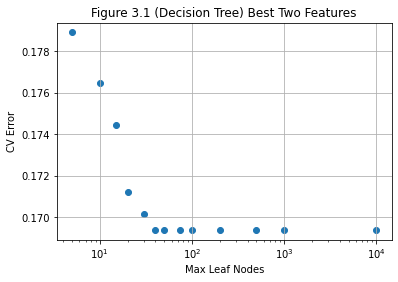

In [127]:
# Using the best two Features in Decision Trees according to Select KBest

bestFeatures = []

for row in trainFeatures:
    featureOne = row[10]
    featureTwo = row[11]
    bestFeatures.append([featureOne, featureTwo])

# Decision Tree CV Error VS Leaf Nodes
cvError = []
leafNodeValues = [5, 10, 15, 20, 30, 40, 50,  75, 100, 200, 500, 1000, 10000]

# Get cv error for all num of mex leaf nodes in decision trees
for i in leafNodeValues:
    scores = cross_val_score(DecisionTreeClassifier(criterion = "entropy", max_leaf_nodes = i), bestFeatures, trainDigits, cv = 10)
    cvError.append(1 - scores.mean())
    print("Accuracy : (Max Leaf Nodes = %i) : %0.2f (+/- %0.2f)" % (i,scores.mean(), scores.std() * 2))

# Plot the results
mp.scatter(leafNodeValues, cvError)
mp.title('Figure 3.1 (Decision Tree) Best Two Features')
mp.xlabel('Max Leaf Nodes')
mp.ylabel('CV Error')
mp.grid()
mp.xscale("log")
show()

Accuracy : (Max Leaf Nodes = 5) : 0.77 (+/- 0.02)
Accuracy : (Max Leaf Nodes = 10) : 0.78 (+/- 0.02)
Accuracy : (Max Leaf Nodes = 15) : 0.78 (+/- 0.02)
Accuracy : (Max Leaf Nodes = 20) : 0.78 (+/- 0.02)
Accuracy : (Max Leaf Nodes = 30) : 0.78 (+/- 0.02)
Accuracy : (Max Leaf Nodes = 40) : 0.78 (+/- 0.02)
Accuracy : (Max Leaf Nodes = 50) : 0.78 (+/- 0.02)
Accuracy : (Max Leaf Nodes = 75) : 0.78 (+/- 0.02)
Accuracy : (Max Leaf Nodes = 100) : 0.78 (+/- 0.02)
Accuracy : (Max Leaf Nodes = 200) : 0.78 (+/- 0.02)
Accuracy : (Max Leaf Nodes = 500) : 0.78 (+/- 0.02)
Accuracy : (Max Leaf Nodes = 1000) : 0.78 (+/- 0.02)
Accuracy : (Max Leaf Nodes = 10000) : 0.78 (+/- 0.02)


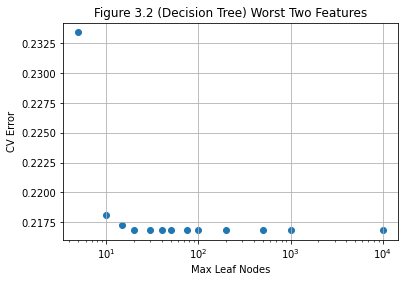

In [130]:
# Using the worst two Features in Decision Trees according to Select KBest

worstFeatures = []

for row in trainFeatures:
    featureOne = row[3]
    featureTwo = row[9]
    worstFeatures.append([featureOne, featureTwo])

# Decision Tree CV Error VS Leaf Nodes
cvError = []
leafNodeValues = [5, 10, 15, 20, 30, 40, 50,  75, 100, 200, 500, 1000, 10000]

# Get cv error for all num of mex leaf nodes in decision trees
for i in leafNodeValues:
    scores = cross_val_score(DecisionTreeClassifier(criterion = "entropy", max_leaf_nodes = i), worstFeatures, trainDigits, cv = 10)
    cvError.append(1 - scores.mean())
    print("Accuracy : (Max Leaf Nodes = %i) : %0.2f (+/- %0.2f)" % (i,scores.mean(), scores.std() * 2))

# Plot the results
mp.scatter(leafNodeValues, cvError)
mp.title('Figure 3.2 (Decision Tree) Worst Two Features')
mp.xlabel('Max Leaf Nodes')
mp.ylabel('CV Error')
mp.grid()
mp.xscale("log")
show()

Accuracy : (Max Leaf Nodes = 5) : 0.76 (+/- 0.00)
Accuracy : (Max Leaf Nodes = 10) : 0.76 (+/- 0.01)
Accuracy : (Max Leaf Nodes = 15) : 0.76 (+/- 0.01)
Accuracy : (Max Leaf Nodes = 20) : 0.75 (+/- 0.01)
Accuracy : (Max Leaf Nodes = 30) : 0.75 (+/- 0.01)
Accuracy : (Max Leaf Nodes = 40) : 0.75 (+/- 0.01)
Accuracy : (Max Leaf Nodes = 50) : 0.75 (+/- 0.02)
Accuracy : (Max Leaf Nodes = 75) : 0.75 (+/- 0.02)
Accuracy : (Max Leaf Nodes = 100) : 0.75 (+/- 0.02)
Accuracy : (Max Leaf Nodes = 200) : 0.75 (+/- 0.02)
Accuracy : (Max Leaf Nodes = 500) : 0.73 (+/- 0.02)
Accuracy : (Max Leaf Nodes = 1000) : 0.71 (+/- 0.03)
Accuracy : (Max Leaf Nodes = 10000) : 0.68 (+/- 0.03)


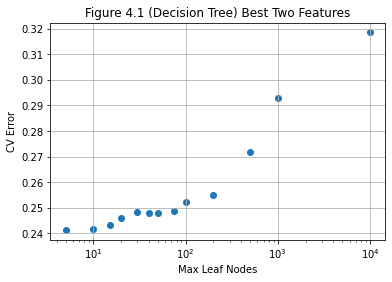

In [133]:
# Using the best two Features in Decision Trees according to Extra Trees

bestFeatures = []

for row in trainFeatures:
    featureOne = row[0]
    featureTwo = row[2]
    bestFeatures.append([featureOne, featureTwo])

# Decision Tree CV Error VS Leaf Nodes
cvError = []
leafNodeValues = [5, 10, 15, 20, 30, 40, 50,  75, 100, 200, 500, 1000, 10000]

# Get cv error for all num of mex leaf nodes in decision trees
for i in leafNodeValues:
    scores = cross_val_score(DecisionTreeClassifier(criterion = "entropy", max_leaf_nodes = i), bestFeatures, trainDigits, cv = 10)
    cvError.append(1 - scores.mean())
    print("Accuracy : (Max Leaf Nodes = %i) : %0.2f (+/- %0.2f)" % (i,scores.mean(), scores.std() * 2))

# Plot the results
mp.scatter(leafNodeValues, cvError)
mp.title('Figure 4.1 (Decision Tree) Best Two Features')
mp.xlabel('Max Leaf Nodes')
mp.ylabel('CV Error')
mp.grid()
mp.xscale("log")
show()

Accuracy : (Max Leaf Nodes = 5) : 0.76 (+/- 0.00)
Accuracy : (Max Leaf Nodes = 10) : 0.76 (+/- 0.00)
Accuracy : (Max Leaf Nodes = 15) : 0.76 (+/- 0.00)
Accuracy : (Max Leaf Nodes = 20) : 0.76 (+/- 0.00)
Accuracy : (Max Leaf Nodes = 30) : 0.76 (+/- 0.00)
Accuracy : (Max Leaf Nodes = 40) : 0.76 (+/- 0.00)
Accuracy : (Max Leaf Nodes = 50) : 0.76 (+/- 0.00)
Accuracy : (Max Leaf Nodes = 75) : 0.76 (+/- 0.00)
Accuracy : (Max Leaf Nodes = 100) : 0.76 (+/- 0.00)
Accuracy : (Max Leaf Nodes = 200) : 0.76 (+/- 0.00)
Accuracy : (Max Leaf Nodes = 500) : 0.76 (+/- 0.00)
Accuracy : (Max Leaf Nodes = 1000) : 0.76 (+/- 0.00)
Accuracy : (Max Leaf Nodes = 10000) : 0.76 (+/- 0.00)


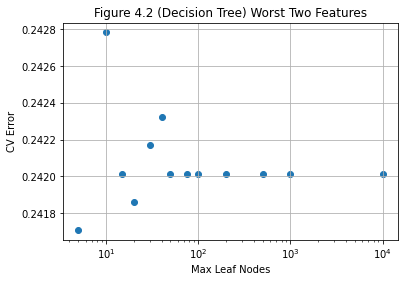

In [134]:
# Using the worst two Features in Decision Trees according to Extra Trees

worstFeatures = []

for row in trainFeatures:
    featureOne = row[8]
    featureTwo = row[13]
    worstFeatures.append([featureOne, featureTwo])

# Decision Tree CV Error VS Leaf Nodes
cvError = []
leafNodeValues = [5, 10, 15, 20, 30, 40, 50,  75, 100, 200, 500, 1000, 10000]

# Get cv error for all num of mex leaf nodes in decision trees
for i in leafNodeValues:
    scores = cross_val_score(DecisionTreeClassifier(criterion = "entropy", max_leaf_nodes = i), worstFeatures, trainDigits, cv = 10)
    cvError.append(1 - scores.mean())
    print("Accuracy : (Max Leaf Nodes = %i) : %0.2f (+/- %0.2f)" % (i,scores.mean(), scores.std() * 2))

# Plot the results
mp.scatter(leafNodeValues, cvError)
mp.title('Figure 4.2 (Decision Tree) Worst Two Features')
mp.xlabel('Max Leaf Nodes')
mp.ylabel('CV Error')
mp.grid()
mp.xscale("log")
show()

# Gaussian Naive Bayes

In [146]:
# Get the best two features according to Kbest
bestFeatures = []

for row in trainFeatures:
    featureOne = row[10]
    featureTwo = row[11]
    bestFeatures.append([featureOne, featureTwo])

# Get accuracy of training data
scores = cross_val_score(GaussianNB(), bestFeatures, trainDigits, cv = 10)
print("Accuracy of Gaussian Naive Bayes according to Kbest two best features: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

# Get the worst two features according to Kbest
worstFeatures = []

for row in trainFeatures:
    featureOne = row[3]
    featureTwo = row[9]
    worstFeatures.append([featureOne, featureTwo])

# Get accuracy of training data
scores = cross_val_score(GaussianNB(), worstFeatures, trainDigits, cv = 10)
print("Accuracy of Gaussian Naive Bayes according to Kbest worst best features: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

# Get the best two features according to Extra Trees
bestFeatures = []

for row in trainFeatures:
    featureOne = row[0]
    featureTwo = row[2]
    bestFeatures.append([featureOne, featureTwo])

# Get accuracy of training data
scores = cross_val_score(GaussianNB(), bestFeatures, trainDigits, cv = 10)
print("Accuracy of Gaussian Naive Bayes according to Extra Trees two best features: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

# Get the worst two features according to Kbest
worstFeatures = []

for row in trainFeatures:
    featureOne = row[8]
    featureTwo = row[13]
    worstFeatures.append([featureOne, featureTwo])

# Get accuracy of training data
scores = cross_val_score(GaussianNB(), worstFeatures, trainDigits, cv = 10)
print("Accuracy of Gaussian Naive Bayes according to Extra Trees worst best features: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy of Gaussian Naive Bayes according to Kbest two best features: 0.80 (+/- 0.01)
Accuracy of Gaussian Naive Bayes according to Kbest worst best features: 0.76 (+/- 0.02)
Accuracy of Gaussian Naive Bayes according to Extra Trees two best features: 0.76 (+/- 0.00)
Accuracy of Gaussian Naive Bayes according to Extra Trees worst best features: 0.76 (+/- 0.00)


# Conclusion:
The KBest Classifier did the best when it came to selecting the best two features that have the strongest relationship with the output. The best two features selected by KBest was consistent through out all three models. When using decision trees there was a 0.2 difference when using the best two features from KBest compared to using all 14 features in the decision tree. In the other hand, ExtraTreesClassifier did not have higher accuracy in any of the models against KBest classifier. 